# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Yuyang

Last Name: Du

Student ID: 915528062

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
sf = sql.connect("sf_data.sqlite")
pd.read_sql("SELECT * FROM sqlite_master", sf)

,type,name,tbl_name,rootpage,sql
0,table,crime,crime,2,"CREATE TABLE ""crime"" (\n""IncidntNum"" INTEGER,\..."
1,table,noise,noise,35775,"CREATE TABLE ""noise"" (\n""CaseID"" INTEGER,\n ""..."
2,table,parking,parking,35921,"CREATE TABLE ""parking"" (\n""Owner"" TEXT,\n ""Ad..."
3,table,schools,schools,35944,"CREATE TABLE ""schools"" (\n""Name"" TEXT,\n ""Ent..."
4,table,parks,parks,35961,"CREATE TABLE ""parks"" (\n""Name"" TEXT,\n ""Type""..."
5,table,zillow,zillow,35967,"CREATE TABLE ""zillow"" (\n""RegionName"" INTEGER,..."
6,table,mobile_food_permits,mobile_food_permits,36050,"CREATE TABLE ""mobile_food_permits"" (\n""permit""..."
7,table,mobile_food_locations,mobile_food_locations,36060,"CREATE TABLE ""mobile_food_locations"" (\n""locat..."
8,table,mobile_food_schedule,mobile_food_schedule,36079,"CREATE TABLE ""mobile_food_schedule"" (\n""locati..."


In [3]:
pd.read_sql("SELECT * FROM mobile_food_permits", sf)

,permit,Status,Applicant,FacilityType,FoodItems,PriorPermit,Approved,Expiration
0,16MFF-0027,APPROVED,F & C Catering,Truck,Cold Truck: Hot/Cold Sandwiches: Water: Soda: ...,1,2016-03-09 12:00:00,2017-03-15 12:00:00
1,13MFF-0102,EXPIRED,Natan's Catering,Truck,Burgers: melts: hot dogs: burritos:sandwiches:...,1,2013-04-12 12:00:00,2014-03-15 12:00:00
2,16MFF-0069,APPROVED,Munch A Bunch,Truck,Cold Truck: packaged sandwiches: pitas: breakf...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
3,16MFF-0051,APPROVED,Park's Catering,Truck,Cold Truck: Hamburger: cheeseburgers: hot dogs...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
4,16MFF-0010,REQUESTED,Pipo's Grill,Truck,Tacos: Burritos: Hot Dogs: and Hamburgers,0,None,None
5,16MFF-0024,APPROVED,"Off the Grid Services, LLC",Truck,Everything,0,2016-03-17 12:00:00,2017-03-15 12:00:00
6,14MFF-0034,EXPIRED,Bach Catering,Truck,Cold Truck: Cheeseburgers: Burgers: Chicken Ba...,1,2014-03-13 12:00:00,2015-03-15 12:00:00
7,16MFF-0048,REQUESTED,Singh Brothers Ice Cream,Truck,Ice Cream: Pre-Packaged Chips: Candies: Bottle...,1,None,2017-03-15 12:00:00
8,16MFF-0036,APPROVED,Roadside Rotisserie Corporation / Country Grill,Truck,Rotisserie Chicken: Ribs: Kickass Salad: Potat...,0,2016-03-10 12:00:00,2017-03-15 12:00:00
9,14MFF-0001,EXPIRED,Sun Rise Catering,Truck,Cold Truck: sandwiches: drinks: snacks: candy:...,1,2014-09-10 12:00:00,2015-03-15 12:00:00


In [4]:
#Merge the permit table and schedule table
location = pd.read_sql(
    "SELECT L.permit, L.Status, L.Applicant, L.FacilityType, R.permit, R.locationid "
    "FROM mobile_food_permits AS L INNER JOIN mobile_food_schedule AS R ON L.permit = R.permit and L.Status = 'APPROVED'",sf 
)
location = location.drop_duplicates()
location.head()

,permit,Status,Applicant,FacilityType,permit,locationid
0,16MFF-0027,APPROVED,F & C Catering,Truck,16MFF-0027,762178
10,16MFF-0027,APPROVED,F & C Catering,Truck,16MFF-0027,762179
15,16MFF-0027,APPROVED,F & C Catering,Truck,16MFF-0027,762180
20,16MFF-0027,APPROVED,F & C Catering,Truck,16MFF-0027,762181
25,16MFF-0027,APPROVED,F & C Catering,Truck,16MFF-0027,762182


In [5]:
#Count locations and choose the one that sell at most locations
app = location.loc[:,['Applicant','locationid']]
app_cnt = app.groupby('Applicant').count()
app_cnt[app_cnt.locationid == app_cnt.locationid.max()]

,locationid
Applicant,
Park's Catering,23


Screen permits and only choose the approved ones, then count distinct locations. Among all the mobile food vendors, Park's catering sells at 23 locations and it's the food vender that sells at the most locations.

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import geopandas as gpd
import osmnx as ox
import shapely.geometry as geom

In [7]:
sfmap = gpd.read_file("SF Find Neighborhoods.geojson")
sfmap.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,(POLYGON ((-122.4934552679999 37.7835181710000...
1,None,Lake Street,(POLYGON ((-122.4871507149999 37.7837854270000...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,(POLYGON ((-122.4775801709999 37.8109931130000...
3,None,Presidio Terrace,(POLYGON ((-122.4724105299999 37.7873465390000...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,(POLYGON ((-122.4726257899999 37.7863148060000...


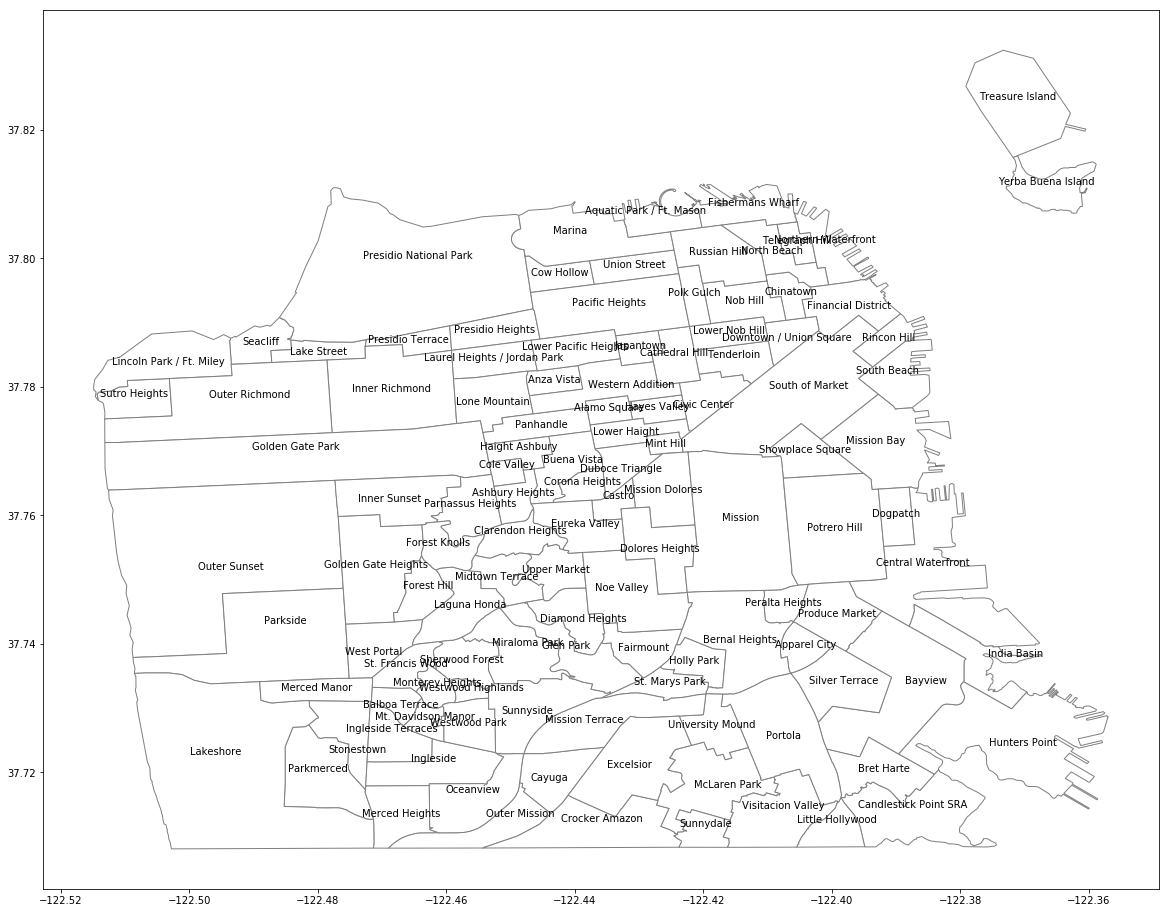

In [8]:
#Draw the map of San Francisco
# Given a row, this function gets a point and plots the post code at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row['name'], xy = coords, horizontalalignment = "center")

ax = sfmap.plot(figsize = (20,20),edgecolor = "grey", color = "white")
sfmap.apply(add_label, axis = 1)
plt.show()

### (a) Which parts of the city are the most and least expensive?

In [9]:
#Obtain the post codes
postcode = gpd.read_file('cb_2016_us_zcta510_500k.shp')
postcode.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [10]:
#Exract region names and locations
post = pd.concat([postcode.iloc[:,0].astype('int64'), postcode.iloc[:,5]],axis = 1)
post.columns = ['RegionName','geometry']
post.head()

,RegionName,geometry
0,21914,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,1001,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [11]:
# Given a row, this function gets a point and plots the post code at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.ZCTA5CE10, xy = coords, horizontalalignment = "center")

In [12]:
#Obtain the housing price in SF
zillow = pd.read_sql("SELECT * FROM zillow", sf)
zillow.head()

,RegionName,Date,ZriPerSqft_AllHomes,MedianSoldPricePerSqft_AllHomes,PriceToRentRatio_AllHomes,Turnover_AllHomes
0,94109,2010-11-01 00:00:00,3.156,675.1913,19.14,6.0771
1,94110,2010-11-01 00:00:00,2.566,599.6785,18.10,5.4490
2,94122,2010-11-01 00:00:00,2.168,495.4432,17.99,2.4198
3,94080,2010-11-01 00:00:00,1.666,369.5538,18.31,3.8757
4,94112,2010-11-01 00:00:00,2.322,422.4538,14.44,3.1288


In [13]:
#Take the average of prices of different years
hp_avg = pd.read_sql("""
SELECT RegionName, avg(ZriPerSqft_AllHomes) AS rental_price, avg(MedianSoldPricePerSqft_AllHomes) AS selling_price FROM zillow
GROUP BY(RegionName)
""",sf)
hp_avg.head()

,RegionName,rental_price,selling_price
0,94080,2.172000,375.629802
1,94102,3.984933,626.417276
2,94103,3.679040,604.009929
3,94104,NaN,1336.128581
4,94105,4.279173,798.257824


In [14]:
#Attach the location to price
hp_avg_loc = pd.merge(hp_avg, post, on = "RegionName")
hp_avg_loc = gpd.GeoDataFrame(hp_avg_loc, geometry = hp_avg_loc.geometry)
hp_avg_loc.head()

,RegionName,rental_price,selling_price,geometry
0,94080,2.172000,375.629802,"POLYGON ((-122.469009 37.650404, -122.458997 3..."
1,94102,3.984933,626.417276,"POLYGON ((-122.429929 37.777909, -122.426829 3..."
2,94103,3.679040,604.009929,"POLYGON ((-122.426418 37.765784, -122.426402 3..."
3,94104,NaN,1336.128581,"POLYGON ((-122.404613 37.793565, -122.401315 3..."
4,94105,4.279173,798.257824,"POLYGON ((-122.403456 37.787776, -122.401939 3..."


In [15]:
#Find the most expensive area according to rental price
hp_avg[hp_avg.rental_price == hp_avg.rental_price.max()]

,RegionName,rental_price,selling_price
4,94105,4.279173,798.257824


In [16]:
#Find the least expensive area according to rental price
hp_avg[hp_avg.rental_price == hp_avg.rental_price.min()]

,RegionName,rental_price,selling_price
0,94080,2.172,375.629802


C:\Users\KH7020823\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


[Text(0.5,1,'Most expensive area in San Francisco')]

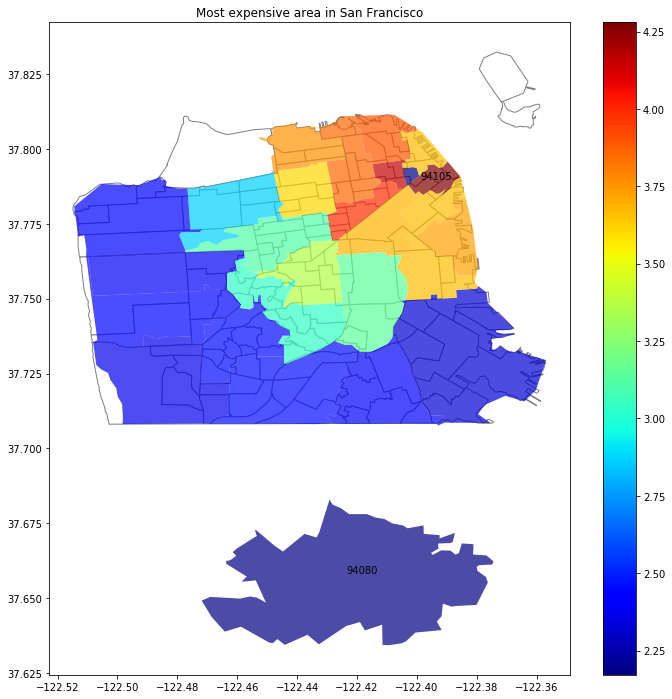

In [17]:
#Draw the plot of rental price in different area
ax = sfmap.plot(figsize = (12,12),color = "white", edgecolor = "gray")
hp_avg_loc.plot(ax = ax,column = "rental_price",cmap = "jet",legend = True, alpha = 0.7)

#Attach the label
postcode[postcode.ZCTA5CE10 == '94105'].apply(add_label, axis = 1)
postcode[postcode.ZCTA5CE10 == '94080'].apply(add_label, axis = 1)
ax.set(title = "Most expensive area in San Francisco")

In [18]:
#Find the most expensive area according to selling price
hp_avg[hp_avg.selling_price == hp_avg.selling_price.max()]

,RegionName,rental_price,selling_price
3,94104,NaN,1336.128581


In [19]:
#Find the least expensive area according to selling price
hp_avg[hp_avg.selling_price == hp_avg.selling_price.min()]

,RegionName,rental_price,selling_price
19,94124,2.32816,297.008046


[Text(0.5,1,'Most expensive area in San Francisco')]

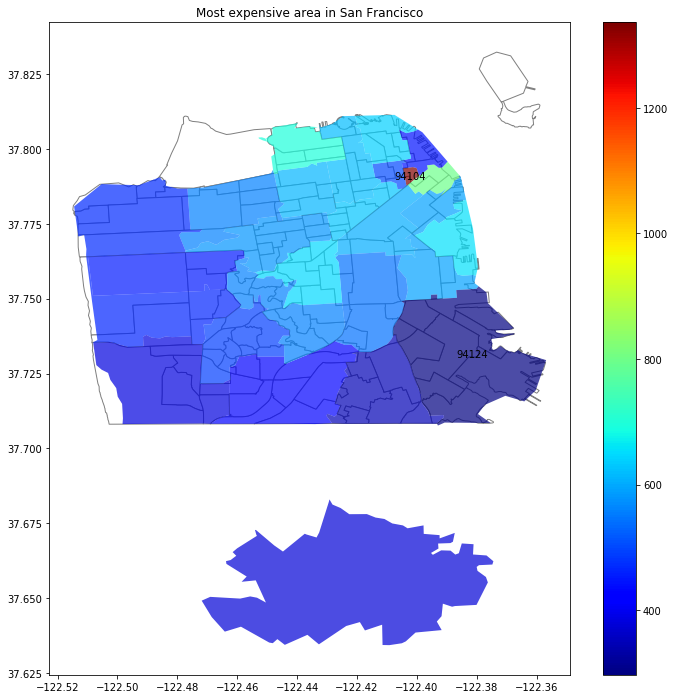

In [20]:
#Draw the plot of selling price in different area
ax = sfmap.plot(figsize = (12,12),color = "white", edgecolor = "gray")
hp_avg_loc.plot(ax = ax,column = "selling_price",cmap = "jet",legend = True, alpha = 0.7)

#Attach the label
postcode[postcode.ZCTA5CE10 == '94104'].apply(add_label, axis = 1)
postcode[postcode.ZCTA5CE10 == '94124'].apply(add_label, axis = 1)
ax.set(title = "Most expensive area in San Francisco")

The table "zillow" has housing prices for each region in San Francisco for several years. And the data contains two prices, rental price and selling price. Group the data by region name and compute the mean rental price and mean selling price of each region. Then select the regions with the highest or lowest price based on rental price and selling price respectively.

The most expensive region in rental price is parts of Rinclon Hill, Financial District, South Beach and South of Market(94105), and the most expensive region in selling price is Union Square(94104). Both places locate in the northeast area of San Francisco, which is near the seaside and the piers which are famous tourists’ attractions. 

The least expensive region in rental price is South San Francisco(94080), and the most expensive region in selling price is Bayview, Silver Tarrace, Hunters Point,etc.(94124). 94080 is south San Francisco which is an area with dense population, and 94124 also locate in south part of San Francisco.

Generally, the renting and selling prices are higher in the north and lower in the south. It’s a reasonable result because the north part is developed earlier and has good sceneries that provide more convenient and pleasant life. Also, it’s filled with population very quickly which may push new comers south.

### (b)Which parts of the city are the most dangerous (and at what times)?

In [21]:
crime = pd.read_sql("SELECT * FROM crime", sf)
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469


In [22]:
lnglat = [geom.Point(x) for x in zip(crime.Lon, crime.Lat)]
crime_loc = gpd.GeoDataFrame(crime, geometry = lnglat)

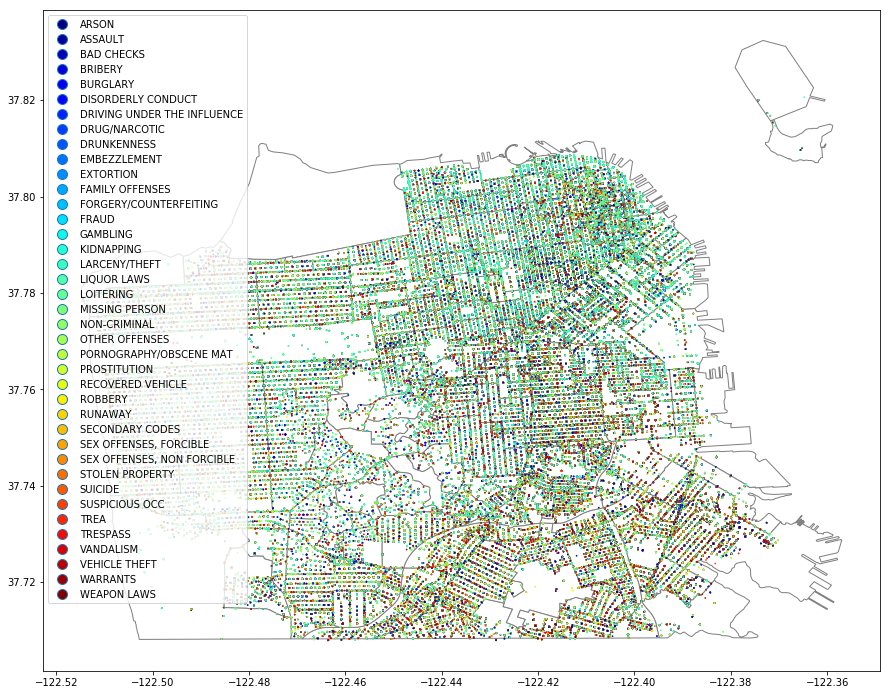

In [23]:
# Make the plot.
ax = sfmap.plot(figsize = (15,15),color = "white", edgecolor = "gray")
crime_loc.plot(ax = ax, column = 'Category', cmap = 'jet', markersize = 0.5, legend = True)

In [24]:
#Count the number of crimes group by Address
locc = pd.read_sql("""
SELECT Address, Count(*) as count,Lon,Lat FROM crime
GROUP BY(Address)
""",sf)
locc.head()

,Address,count,Lon,Lat
0,0 Block of 10TH AV,5,-122.469055,37.786629
1,0 Block of 10TH ST,196,-122.417258,37.776270
2,0 Block of 11TH AV,1,-122.470124,37.786582
3,0 Block of 11TH ST,60,-122.417930,37.774903
4,0 Block of 12TH AV,16,-122.471194,37.786532


In [25]:
#Find the address with relatively crimes
locc[locc['count'] == locc['count'].max()]

,Address,count,Lon,Lat
11751,800 Block of BRYANT ST,30903,-122.403405,37.775421


[Text(0.5,1,'Address of most crimes')]

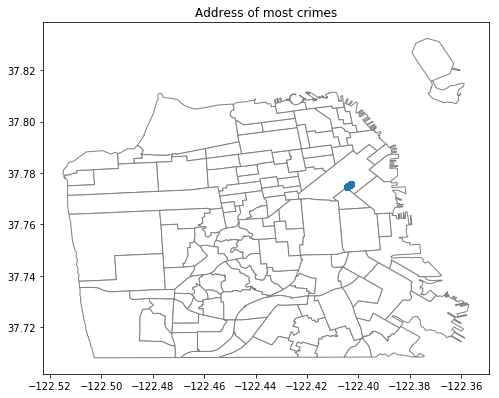

In [26]:
#Draw the plot of the address with most crimes
ax = sfmap.plot(figsize = (8,8),color = "white", edgecolor = "gray")
crime_loc[crime_loc.Address == '800 Block of BRYANT ST'].plot(ax = ax)
ax.set(title = "Address of most crimes")

In [27]:
#Count the number of crimes group by PDdistrict
locc2 = pd.read_sql("""
SELECT PDdistrict, Count(*) as count FROM crime
GROUP BY(PDdistrict)
""",sf)
locc2

,PdDistrict,count
0,None,1
1,BAYVIEW,101655
2,CENTRAL,109242
3,INGLESIDE,89044
4,MISSION,136216
5,NORTHERN,124365
6,PARK,60974
7,RICHMOND,56258
8,SOUTHERN,196178
9,TARAVAL,75459


In [28]:
locc2[locc2['count']>100000]

,PdDistrict,count
1,BAYVIEW,101655
2,CENTRAL,109242
4,MISSION,136216
5,NORTHERN,124365
8,SOUTHERN,196178


[Text(0.5,1,'PDdistrict of most crimes')]

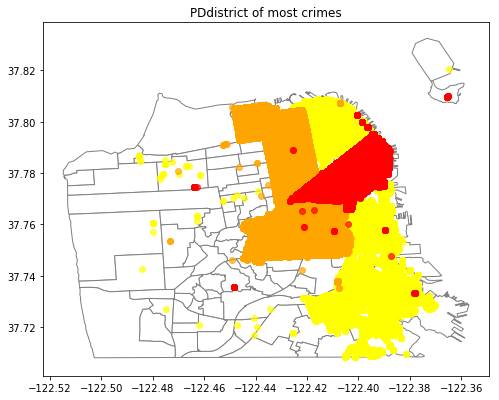

In [29]:
#Draw the PDditstrcts with most crimes
ax = sfmap.plot(figsize = (8,8),color = "white", edgecolor = "gray")
crime_loc[crime_loc.PdDistrict == 'BAYVIEW'].plot(ax = ax,color = 'yellow',alpha = 0.7)
crime_loc[crime_loc.PdDistrict == 'CENTRAL'].plot(ax = ax,color = 'yellow',alpha = 0.7)
crime_loc[crime_loc.PdDistrict == 'MISSION'].plot(ax = ax,color = 'orange',alpha = 0.7)
crime_loc[crime_loc.PdDistrict == 'NORTHERN'].plot(ax = ax,color = 'orange',alpha = 0.7)
crime_loc[crime_loc.PdDistrict == 'SOUTHERN'].plot(ax = ax,color = 'red',alpha = 0.7)

ax.set(title = "PDdistrict of most crimes")

In [30]:
#Count the number of crimes of each hour in a day
timec = pd.read_sql("""
SELECT strftime('%H',Datetime) AS hour, Count(*) FROM crime
GROUP BY(hour)
""",sf)
timec

,hour,Count(*)
0,00,53852
1,01,31593
2,02,25794
3,03,16994
4,04,11980
5,05,11061
6,06,15743
7,07,25145
8,08,36816
9,09,40400


In [31]:
#Find the time with most crimes
timec[timec['Count(*)'] == timec['Count(*)'].max()]

,hour,Count(*)
18,18,66665


In [32]:
#Find the time with least crimes
timec[timec['Count(*)'] == timec['Count(*)'].min()]

,hour,Count(*)
5,05,11061


C:\Users\KH7020823\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


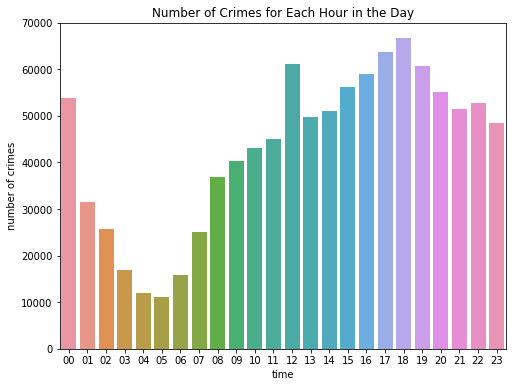

In [33]:
#Draw the number of crimes for each hour in the day
plt.figure(figsize=(8,6))
ctime = sns.barplot(x = timec['hour'],y = timec['Count(*)'])
ctime.set(title = "Number of Crimes for Each Hour in the Day", xlabel = "time", ylabel = "number of crimes")
plt.show()

By counting the number of crimes in each address and PdDistrict, we can compare the crime rates of different parts of San Francisco. Southern PdDistrict, which locates in the northeast part of the city, has the most crimes in San Francisco. To be more specific, 800 Block of BRYANT ST has the most crimes among all the addresses. And Mission and Northern PdDistricts also have relatively high crime rates. These two areas are next to the Southern PdDistrict, close to the middle of the city. Besides, Bayview and Central PdDistrict are also not very safe, having more than 100000 crimes in the district. Therefore, northeast San Francisco are the most dangerous parts.

Grouping the crime data by time, we can know from the bar plot that the number of crimes is lowest at 5 am – 6 am, and increases afterwards, then achieves the peak at 6 pm - 7 pm. Therefore, the most dangerous time in San Francisco is 6 pm – 7 pm.

(c) Are noise complaints and mobile food vendors related?

In [34]:
noise = pd.read_sql("SELECT * FROM noise", sf)
noise.head()

,CaseID,Type,Address,Neighborhood,Datetime,Lat,Lon
0,5130305,other_excessive_noise,Not associated with a specific address,None,2015-09-25 00:29:33,NaN,NaN
1,6446138,amplified_sound_electronics,Intersection of CLINTON PARK and GUERRERO ST,Mission Dolores,2016-10-21 13:20:18,37.769148,-122.424475
2,5929789,other_excessive_noise,"1301 48TH AVE, SAN FRANCISCO, CA, 94122",Outer Sunset,2016-06-01 11:38:59,37.762047,-122.508365
3,5659943,other_excessive_noise,"736 LEAVENWORTH ST, SAN FRANCISCO, CA, 94109",Lower Nob Hill,2016-03-13 01:18:27,37.787983,-122.414943
4,5930704,other_excessive_noise,"1360 43RD AVE, SAN FRANCISCO, CA, 94122",Outer Sunset,2016-06-01 13:58:43,37.761385,-122.502232


In [35]:
lnglat = [geom.Point(x) for x in zip(noise.Lon, noise.Lat)]
noise_loc = gpd.GeoDataFrame(noise, geometry = lnglat)

[Text(0.5,1,'General Noise Complaints Location')]

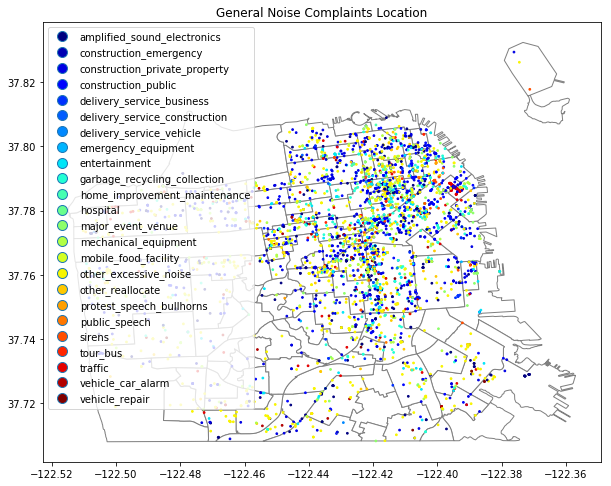

In [36]:
# Make the plot of general noise locations
ax = sfmap.plot(figsize = (10,10),color = "white", edgecolor = "gray")
noise_loc.plot(ax = ax, column = "Type", cmap = "jet", markersize = 3, legend = True)
ax.set(title = "General Noise Complaints Location")

[Text(0.5,1,'Mobile Food Facility Noise Complaints Location')]

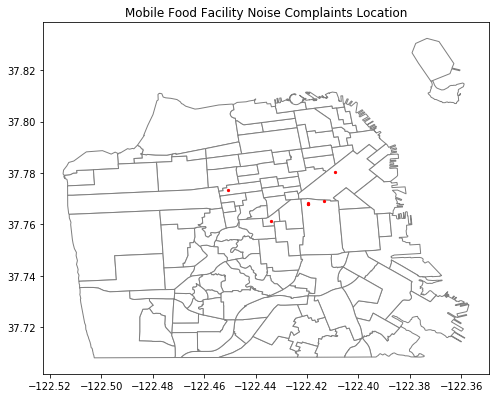

In [37]:
# Make the plot of locations of noise related to mobile food facility
ax = sfmap.plot(figsize = (8,8),color = "white", edgecolor = "gray")
noise_loc[noise_loc.Type == 'mobile_food_facility'].plot(ax = ax, markersize = 5, color = 'red')
ax.set(title = "Mobile Food Facility Noise Complaints Location")

In [38]:
#Join tables of mobil food schedules and locations
mf = pd.read_sql(
    "SELECT L.locationid, R.Latitude, R.Longitude "
    "FROM mobile_food_schedule AS L INNER JOIN mobile_food_locations AS R ON L.locationid = R.locationid "
    "WHERE (R.Latitude <> 0 AND R.Longitude <> 0)",sf )

In [39]:
lnglat = [geom.Point(x) for x in zip(mf.Longitude, mf.Latitude)]
mf_loc = gpd.GeoDataFrame(mf, geometry = lnglat)
mf_loc.head()

,locationid,Latitude,Longitude,geometry
0,762182,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
1,762182,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
2,762182,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
3,762182,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
4,762182,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)


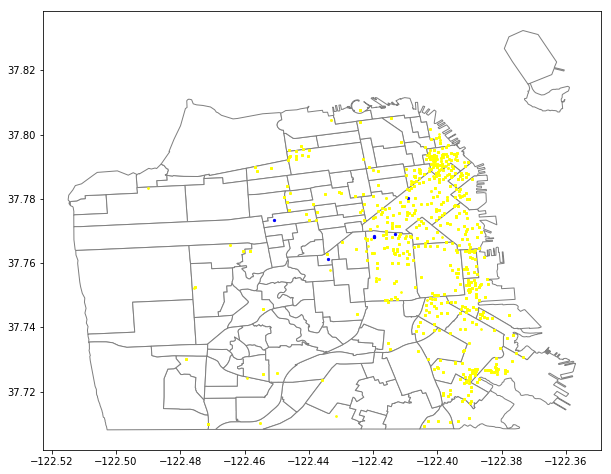

In [40]:
# Make the plot of mobile food facility locations and relative noise complains
ax = sfmap.plot(figsize = (10,10),color = "white", edgecolor = "gray")
noise_loc[noise_loc.Type == 'mobile_food_facility'].plot(ax = ax, markersize = 5, color = 'blue')
mf_loc.plot(ax = ax, markersize = 3,color = 'yellow')

According to the noise table, we can see that among all kinds of nose complaints, the noise complaints related to mobile food vendors are quite few (only five), and the location of this kind of noise are dispersive. And the mobile food vendors have very dense catering locations in the east part of San Francisco, especially the northeast part.

By comparing the distribution of mobile food catering locations and the corresponding noise, it is apparent that their patterns don’t coincide. Some complaints locate in parts that mobile food facilities are very sparse, and in the places that mobile food vendors gather most don’t have a single complaint about them. In regard of other noises, generally they spread over northeast and middle parts of San Francisco, and most of them has nothing to do with mobile food facility, with others also have different dispersions compared to that of mobile food catering. Therefore, we can conclude that noise complaints and mobile food vendors are not obviously related.

(d) What are the best times and places to find food trucks?

In [41]:
#Best locations to find food trucks
loidc = pd.read_sql("""
SELECT locationid, Count(*) FROM mobile_food_schedule
GROUP BY(locationid)
ORDER BY Count(*) DESC
""",sf)

In [42]:
#Choose the locations that have no fewer than 15 food trucks
loidct = loidc.head(15)
loidct

,locationid,Count(*)
0,934562,20
1,559774,15
2,559776,15
3,559777,15
4,559778,15
5,559779,15
6,559780,15
7,765691,15
8,765710,15
9,934419,15


[Text(0.5,1,'Best Places to Find Mobile Food Venders')]

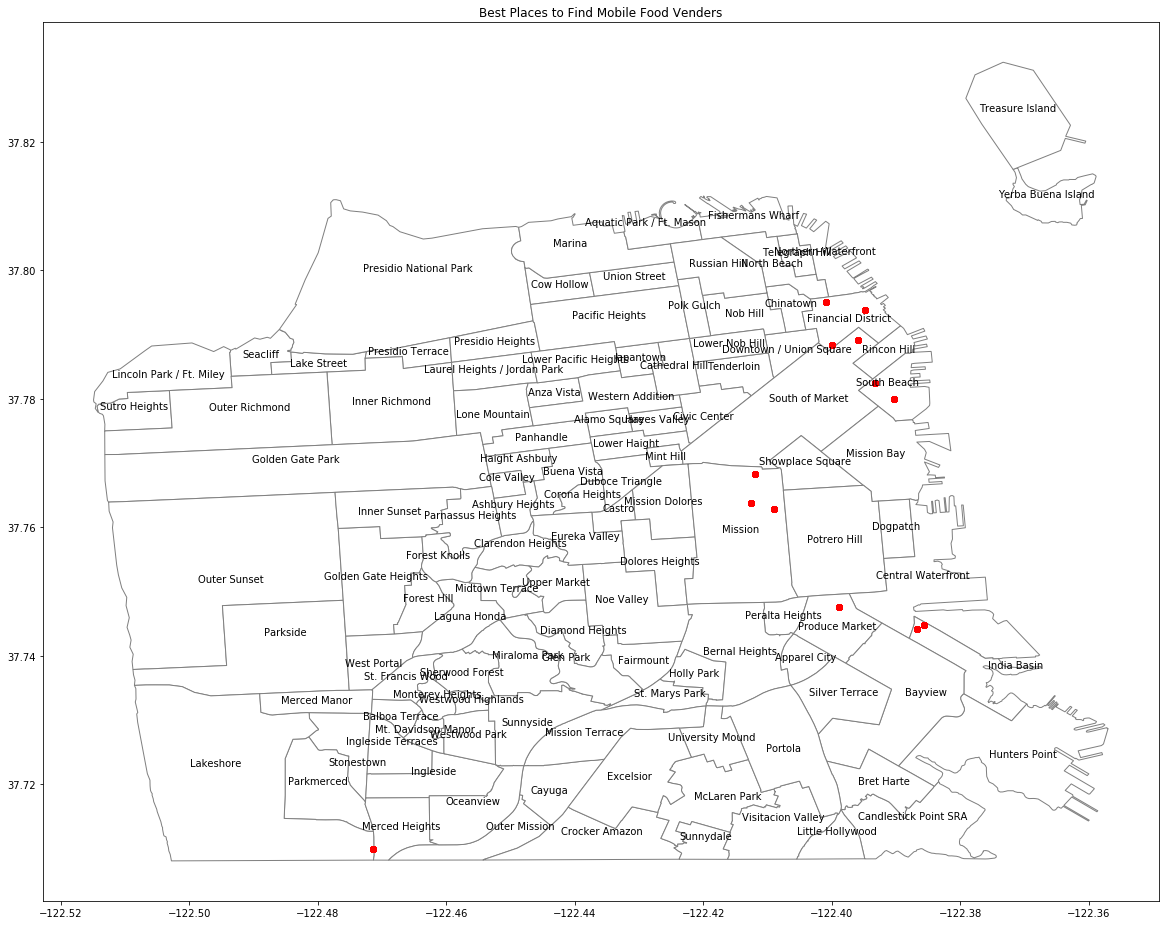

In [43]:
#Obtain the locations of first 15 places
mfm =pd.DataFrame()
for i in range(len(loidct)):
    temp = mf_loc[mf_loc.locationid == loidct.locationid[i]]
    mfm = mfm.append(temp)

#Draw the plot of best places to find mobile food venders
ax = sfmap.plot(figsize = (20,20),color = "white", edgecolor = "gray")
mfm.plot(ax = ax,color = 'red')

def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row['name'], xy = coords, horizontalalignment = "center")

sfmap.apply(add_label, axis = 1)

ax.set(title = "Best Places to Find Mobile Food Venders")

In [44]:
#Best time to find food trucks
timef = pd.read_sql("""
SELECT  StartHour, EndHour, Count(*) FROM mobile_food_schedule
GROUP BY StartHour, EndHour
ORDER BY Count(*) DESC
""",sf)
timef.head(10)

,StartHour,EndHour,Count(*)
0,9,10,534
1,10,11,443
2,0,13,298
3,8,9,265
4,11,0,262
5,7,8,166
6,6,7,90
7,6,12,84
8,13,14,78
9,14,15,70


By counting the number of food trucks in different locations in San Francisco, we can choose the first 15 locations that have the most food trucks. Among them, the place with location ID 934562 has the most food trucks whose number is 20, and all the other 14 locations have 15 food trucks catering in the place. Marking them on the map of San Francisco, it’s easy to recognize that mostly these locations are set in the east part of San Francisco. Specifically, they are Financial District, South of Market, South Beach, Mission, Produce Market, India Basin and Merced Heights (Only place that’s in the west part).

To find out the time that the most food trucks are working, we can group the mobile food schedule by start hour and end hour and count the number of food trucks of that time. According to the result, the two most common hours are 9 am - 10 am and 10 am - 11 am, accounting for 977 food trucks. Also, 298 food trucks work at 0 am -13 am which cover 9 am – 11 am. Therefore, 9 am – 11 am is the most common catering time among mobile food vendors, that is, also the best time to find food trucks.

(e) Is there a relationship between housing prices and any of the other tables?

Housing price and crime, noise：
According to plots of crimes and noises, we can see that both crime and noise complaints occur more often in northeast San Francisco, which spread similarly with the expensive places. While it can’t be that noisier and more dangerous places are more expensive, but more developed areas attract more people to live, and as a result a denser population can cause more crimes and noises. What is more, it’s also possible that the more developed areas have more efficient police and noise claim systems, then it seems that they have more problems. The other places, if accounting for the unreported crimes and noises, may in fact exceed the developed areas.

In [45]:
school = pd.read_sql("SELECT * FROM schools", sf)
lnglat = [geom.Point(x) for x in zip(school.Lon, school.Lat)]
school_loc = gpd.GeoDataFrame(school, geometry = lnglat)
school_loc.head()

,Name,Entity,LowerGrade,UpperGrade,GradeRange,Category,LowerAge,UpperAge,GeneralType,Address,Lat,Lon,geometry
0,Alamo Elementary School,SFUSD,0,5,K-5,USD Grades K-5,5,10,PS,"250 23RD AVE, San Francisco, CA 94121",37.783005,-122.482300,POINT (-122.4822998 37.78300479999999)
1,Alvarado Elementary School,SFUSD,0,5,K-5,USD Grades K-5,5,10,PS,"625 DOUGLASS ST, San Francisco, CA 94114",37.753681,-122.438194,POINT (-122.4381943 37.7536812)
2,Aptos Middle School,SFUSD,6,8,6-8,USD Grades 6-8,11,13,PS,"105 APTOS AVE, San Francisco, CA 94127",37.729672,-122.465782,POINT (-122.4657822 37.7296715)
3,Argonne Early Education School,SFUSD,-2,0,PK-TK,USD PreK/TK,3,5,PS,"750 16TH AVE, San Francisco, CA 94118",37.773968,-122.474060,POINT (-122.4740601 37.7739677)
4,Argonne Elementary School,SFUSD,0,5,K-5,USD Grades K-5,5,10,PS,"680 18TH AVE, San Francisco, CA 94121",37.775307,-122.476311,POINT (-122.4763107 37.7753067)


[Text(0.5,1,'Figure 1: Housing price vs School')]

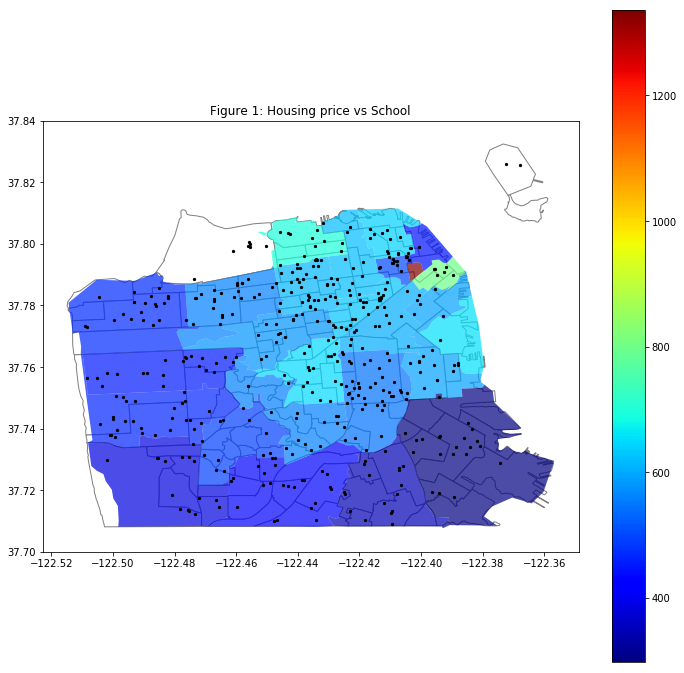

In [46]:
#Draw the plot of locations of schools, parks and parking area
ax = sfmap.plot(figsize = (12,12),color = "white", edgecolor = "gray")
ax.set_ylim([37.7, 37.84])

hp_avg_loc.plot(ax = ax,column = "selling_price",cmap = "jet",legend = True, alpha = 0.7)
school_loc.plot(ax = ax, markersize = 5, color = 'black')

ax.set(title = "Figure 1: Housing price vs School")

Housing price and school:

Figure 1 shows that schools in San Francisco scatter a lot, yet it does appear to become denser in the northeast. So, the housing price and locations of schools may have a relationship. Areas with more schools can satisfy the demands of education, so it will be an advantage that lead to the price increase, although the relationship is not so apparent here, since the dispersion of schools doesn’t differ much among different places.

In [47]:
park = pd.read_sql("SELECT * FROM parks", sf)
lnglat = [geom.Point(x) for x in zip(park.Lon, park.Lat)]
park_loc = gpd.GeoDataFrame(park, geometry = lnglat)
park_loc.head()

,Name,Type,Acreage,ParkID,Lat,Lon,geometry
0,10TH AVE/CLEMENT MINI PARK,Mini Park,0.66,156,37.781844,-122.468099,POINT (-122.46809908 37.78184397)
1,15TH AVENUE STEPS,Mini Park,0.26,185,37.759565,-122.472268,POINT (-122.47226783 37.75956493)
2,24TH/YORK MINI PARK,Mini Park,0.12,51,37.753060,-122.408575,POINT (-122.40857543 37.75306042)
3,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,0.82,194,37.743602,-122.435236,POINT (-122.43523589 37.74360211)
4,ADAM ROGERS PARK,Neighborhood Park or Playground,2.74,46,37.731016,-122.383855,POINT (-122.38385466 37.73101645)


In [48]:
park_loc[park_loc.Lon > -122]

,Name,Type,Acreage,ParkID,Lat,Lon,geometry
33,CAMP MATHER,Family Camp,337.51,10379,37.881602,-119.85076,POINT (-119.85076005 37.88160218)


In [49]:
park_loc[park_loc.Lat < 37.7]

,Name,Type,Acreage,ParkID,Lat,Lon,geometry
192,SHARP PARK,Regional Park,409.69,10380,37.624394,-122.481891,POINT (-122.48189132 37.62439438)


In [50]:
#Drop the two parks that are far from the main area of SF
park_loc1 = park_loc.drop([33,192])

parking = pd.read_sql("SELECT * FROM parking", sf)
lnglat = [geom.Point(x) for x in zip(parking.Lon, parking.Lat)]
parking_loc = gpd.GeoDataFrame(parking, geometry = lnglat)
parking_loc.head()

,Owner,Address,PrimeType,SecondType,GarOrLot,RegCap,ValetCap,MCCap,LandType,Lat,Lon,geometry
0,Private,2110 Market St,PPA,,L,13,0,0,restaurant,37.767378,-122.429344,POINT (-122.429344 37.767378)
1,SFMTA,993 Potrero,PPA,,L,34,0,0,,37.757272,-122.406320,POINT (-122.40632 37.757272)
2,Port of SF,601 Terry A Francois Blvd,PPA,,L,72,0,0,,37.770135,-122.385801,POINT (-122.385801 37.770135)
3,Private,11 SOUTH VAN NESS,PHO,CPO,G,130,0,0,,37.774150,-122.418402,POINT (-122.418402 37.77415)
4,Private,101 CALIFORNIA ST,PPA,,G,250,0,0,,37.793243,-122.397495,POINT (-122.397495 37.793243)


[Text(0.5,1,'Figure 2: Housing price vs Park')]

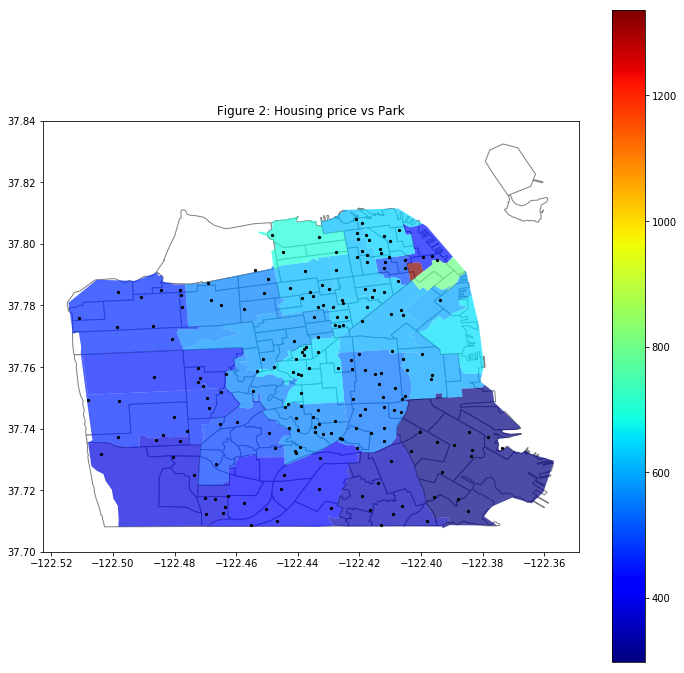

In [51]:
#Draw the plot of locations of schools, parks and parking area
ax = sfmap.plot(figsize = (12,12),color = "white", edgecolor = "gray")
ax.set_ylim([37.7, 37.84])

hp_avg_loc.plot(ax = ax,column = "selling_price",cmap = "jet", legend = True, alpha = 0.7)
park_loc1.plot(ax = ax,markersize = 5, color = 'black')

ax.set(title = "Figure 2: Housing price vs Park")

Housing price and park：

As shown in Figure 2, parks in San Francisco scatter a lot, and many places that are expensive even don’t have a park. So, the housing price and locations of parks don’t have an obvious relationship.

[Text(0.5,1,'Figure 3: Housing price vs Parking')]

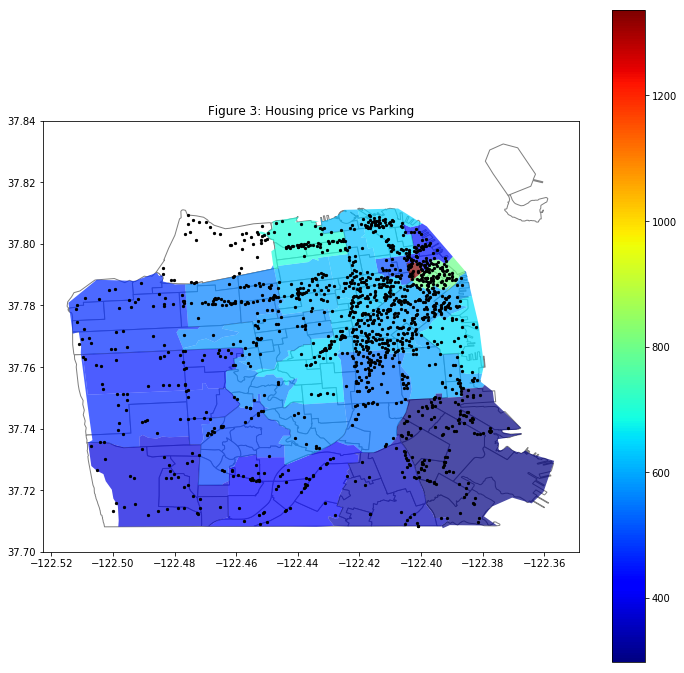

In [52]:
#Draw the plot of locations of schools, parks and parking area
ax = sfmap.plot(figsize = (12,12),color = "white", edgecolor = "gray")
ax.set_ylim([37.7, 37.84])

hp_avg_loc.plot(ax = ax,column = "selling_price",cmap = "jet",legend = True, alpha = 0.7)
parking_loc.plot(ax = ax, markersize = 5, color = 'black')

ax.set(title = "Figure 3: Housing price vs Parking")

Housing price and parking:

In Figure 3, the parking lots mostly locates in the northeast part of San Francisco, which roughly coincide with the factor that northeast San Francisco is more expensive. However, it seems not to be the case that the more parking lots a place have, the more expensive it will be, but that they are both related to the development degree and scenic spots locations. A more developed area will attract more people to buy houses due to its convenience, and more activities to occur which need parking areas for extra people. Also, scenic spots attract tourists and thus call for parking spaces. In this sense, why housing price and parking plot locations coincide is well explained.

In conclusion, housing price has nothing to do with locations of parks, and it may slightly relate to locations of schools. And although the most expensive places have many crimes and noises, they may all be resulted from the development degree of a district, therefore there is no direct relationship between housing price and crime and noise.